<a href="https://colab.research.google.com/github/matthewbegun/MXN500/blob/main/MXN500_2024_WOR_06_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


## About this workshop

This week we will be revisiting the use of the Normal distribution as a tool for simulation. We will look at calculating confidence intervals and performing $t$ tests as a way of characterising uncertainty in experimental data. This requires the use of the $t$ distribution, a continuous distribution which looks a little like the normal distribution but has heavier tails. The $t$ distribution has one parameter, $\nu$, the "degrees of freedom".

* Assumed skills
    - Manipulating data objects
    - Calculating and interpreting summary statistics
    - Writing and executing functions
    - Visualising results with ggplot2
* Learning objectives
    - Performing a hypothesis test
    - Interpreting a hypothesis test
    - Simulation
* Professional skills
    - Visualising results
    - Interpreting a hypothesis test

A reminder of expectations in the workshop:

* Keep a record of the work being completed
* Allow everyone a chance to participate in the workshop
* All opinions are valued provided they do not harm others
* Everyone is expected to help out with completing the work, learning seldom occurs by watching someone else do maths
* Shuffle the group around so that someone different is writing the code

## Set up environment


In [24]:
# imports
import pandas as pd
import plotnine as p9
from scipy import stats

# display all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Activity 1 -- Getting started



In this workshop, we will be investigating the uncertainty in our estimate of the mean age of death in the Brisbane hospital from 1899 to 1913.

Simulation is a useful quantitative method for investigating the validity of some assumptions about a variable of interest. Simulation can be used where a physical system can be described by a model but performing an experiment would be time consuming, costly or dangerous (e.g. simulating radioactive fallout from a damaged nuclear reactor).




**Room discussion:** Today we will be testing a hypothesis about age of death in the Brisbane Hospital from 1899 - 1913. This data has been converted by hand from old records. What issues might there be with this data? What can we do to make sure our data is okay to use?

- could be lies / inaccurate dates of birth
- paper records could have been lost or damaged
- human error inputting data

# Activity 2 -- Summary statistics


**Exercise:** Fill in the blanks in the statement below:

**Answer:** Our random variable, $X$, represents $\dots$. We will assume $X \sim N(\mu, \sigma^2)$ and estimate $\mu$ with $\ldots$ and $\ldots$ with $s$ from our data.


Our random variable, $X$, represents ages of death in a Brisbane hosptial. We will assume $X \sim N(\mu, \sigma^2)$ and estimate $\mu$ with $\bar{x}$ and $\sigma$ with $s$ from our data.


**Exercise:** Calculate the mean, standard deviation and number of deaths in the data frame, storing the results in a data frame. Include them in a table below.

**Answer:**

In [15]:
# read data into dataframe
df = pd.read_csv("data/Deaths.csv")

# find mean, std, count and std error
SumStats = df['Age'].agg(['mean', 'std', 'count', 'sem']).to_frame()
SumStats

,Age
mean,45.201681
std,19.262044
count,4522.000000
sem,0.286442


The standard error of the mean for a set of observations, $\boldsymbol{x}$, is given by

$$
se_{\overline{x}} = \frac{s}{\sqrt{n}}
$$



# Activity 3 -- Confidence intervals


To construct a confidence interval for our mean, we must choose a level of statistical significance, $\alpha$, such that $(1 - \alpha) \times 100%$ is the confidence level we wish to use. For example, a 95% confidence interval corresponds to $\alpha = 0.05$.

**Exercise:** What value of $\alpha$ would we need if constructing 90% confidence intervals?

**Answer:** $\alpha = 0.1$



**Exercise:** What value of $\alpha$ would we need if constructing 99% confidence intervals?

**Answer:** $\alpha = 0.01$

The confidence interval for our mean population age of death (during the years 1899 to 1913), $\mu$, is given by

$$
\overline{x} + t_{\alpha/2}(\nu) \frac{s}{\sqrt{n}} < \mu <  \overline{x} + t_{1-\alpha/2}(\nu) \frac{s}{\sqrt{n}}
$$

where $\overline{x}$ is the sample mean, $s$ is the standard deviation, and $\nu$ is the number of degrees of freedom required to calculate the $\alpha/2$ and $1 - \alpha/2$ quantiles of the $t$ distribution. In the case of a sample mean, $\nu = (n-1)$ as we start with $n$ observations but have to estimate one parameter, $s$, to calculate our standard error. If we knew what the population standard deviation was, $\sigma$, we would not lose one degree of freedom.

**Exercise:** With $\alpha= 0.05$, calculate the 0.025 quantile of the $t$ distribution.

**Answer:**



In [22]:
# from scipy import stats

SumStats.loc['q025'] = stats.t.ppf(q=0.025, df=SumStats.loc['count']-1)
SumStats

,Age
mean,45.201681
std,19.262044
count,4522.000000
sem,0.286442
q025,-1.960489


**Exercise:** With $\alpha= 0.05$, calculate the 0.975 quantile of the $t$ distribution.

**Answer:**






In [23]:
SumStats.loc['q975'] = stats.t.ppf(q=0.975, df=SumStats.loc['count']-1)
SumStats

,Age
mean,45.201681
std,19.262044
count,4522.000000
sem,0.286442
q025,-1.960489
q975,1.960489


You should notice that the 2.5th and 97.5th percentiles of the $t$ distribution are equal in magnitude but opposite in sign. This indicates that our (two-sided) confidence interval will be symmetric about our sample mean.

**Exercise:** Using your data frame containing $\overline{x}, s, n, se_{\overline{x}}$, calculate the 95% confidence interval for $\mu$. State your sample mean and its 95% confidence interval below.

**Answer:** $\ldots (\ldots, \ldots)$



In [30]:
# make some variables to pass around
xbar = SumStats.loc['mean']
se = SumStats.loc['sem']
n = SumStats.loc['count']

q025 = SumStats.loc['q025']
q975 = SumStats.loc['q975']

L95 = xbar + q025 * se
U95 = xbar + q975 * se

SumStats.loc['L95'] = L95
SumStats.loc['U95'] = U95
SumStats

,Age
mean,45.201681
std,19.262044
count,4522.000000
sem,0.286442
q025,-1.960489
q975,1.960489
L95,44.640114
U95,45.763248


**Exercise:** Repeat the above steps to calculate the 90% and 99% confidence intervals. Put the results in a table below.

**Answer:**



In [32]:
# 90% CI
L90 = xbar + stats.t.ppf(0.05, df=n-1) * se
U90 = xbar + stats.t.ppf(0.95, df=n-1) * se

# 99% CI
L99 = xbar + stats.t.ppf(0.005, df=n-1) * se
U99 = xbar + stats.t.ppf(0.995, df=n-1) * se

# update summary
SumStats.loc['L90'] = L90
SumStats.loc['U90'] = U90
SumStats.loc['L99'] = L99
SumStats.loc['U99'] = U99
SumStats

,Age
mean,45.201681
std,19.262044
count,4522.000000
sem,0.286442
q025,-1.960489
q975,1.960489
L95,44.640114
U95,45.763248
L90,44.730429
U90,45.672933


**Exercise:** What do you notice about the width of the confidence intervals as the confidence level increases.

**Answer:** As the confidence level increases the confidence intervals get wider.



If we sampled from the population many times, we would expect to see some sampling variability around the population mean.

**Exercise:** If we collected 100 datasets (each containing the same number of observations) under identical conditions, how many 95% confidence intervals would we expect to contain the true population mean?

**Answer:** We would expect 95 of the confidence intervals to contain the true population mean.

# Activity 4 -- $t$ test


Now that we have some summary statistics describing our estimate of the population mean and a 95% confidence interval for it, we will consider testing a hypothesis about the age of death.

Whilst there is some information available on life expectancy, our data does not have enough information on (for example) gender. As such, we will test our data to see if the population mean age of death was 45 years old.

To perform our $t$ test we need to define a **null hypothesis** which we will be testing, as well as an alternative hypothesis that specifies what we would expect to see if the null hypothesis were not true.

We will define our null hypothesis, $H_0$, as being that the population mean age of death is 45,

$$
H_0: \mu = 45
$$

We will be performing a **two-sided** $t$ test in this case, as the mean age of death could be above or below 45. Therefore we specify our **alternative hypothesis** to be that the population mean is **not** 45.

$$
H_1: \mu \ne 45
$$

Now when we perform our $t$ test, we are looking for evidence to reject our null hypothesis. There are two ways we can conduct our $t$ test, either by focussing on calculating the $p$ value and comparing it to $\alpha$, or by determining some critical value from our $t$ distribution and checking whether our test statistic for the $t$ test is more extreme.

The test statistic for our $t$ test is

$$
t.s. = \frac{\overline{x} - 45}{s/\sqrt{n}}
$$

**Exercise:** Given the values of these that you have already calculated, derive the value of the test statistic.

**Answer:**

In [34]:
# calculate the t-statistic
t_stat = (xbar - 45) / (se)
t_stat

Age    0.704088
dtype: float64

Let's do our $t$ test by looking at how much of a $t$ distribution is beyond our test statistic.

**Exercise:** Calculate the $p$ value for our $t$ test by determining the area to the right of the +ts and to the left of the -ts. Note that we could just double the value in one of the tails as the t-distribution is symmetric.


**Answer:**

In [39]:
# prompt: Calculate the  p  value for our  t  test by determining the area to the right of the +ts and to the left of the -ts. Note that we could just double the value in one of the tails as the t-distribution is symmetric

2*stats.t.cdf(-t_stat, df=n-1)[0]


0.48141398551042736

**Exercise:** Do you have evidence to reject your null hypothesis?

**Answer:** No, there is insufficient evidence to reject $H_0$

We can also use R's built-in `t.test()` function. We need to pass in a vector of values, specify whether our alternative is `"greater"`, `"less"`, or `"two.sided"`, the value we are testing against in our null hypothesis, and a confidence level.

**Exercise:** Perform your $t$ test with a 95% level of confidence ($\alpha = 0.05$). Report the test statistic, confidence interval and $p$ value below.

```{r eval=FALSE}
t.test(
  x = ...,
  alternative = "two.sided",
  mu = 45,
  conf.level = 0.95
)
```

**Answer:**

In [43]:
# prompt: with df perform a t-test that 'Age' does not have a mean of 45, and provide a 95% CI for Age
# needed correcting to use sem instead of std for scale
# perform t-test
t_stat, p_value = stats.ttest_1samp(df['Age'], 45)

# calculate 95% CI
# ci = stats.t.interval(0.95, len(df['Age']) - 1, loc=df['Age'].mean(), scale=df['Age'].std())
ci = stats.t.interval(0.95, len(df['Age']) - 1, loc=df['Age'].mean(), scale=df['Age'].sem())

# print results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"95% CI: {ci}")


t-statistic: 0.7040884015687892
p-value: 0.48141398551042736
95% CI: (44.64011381870007, 45.76324752583774)


**Exercise:** Is our data consistent with the hypothesis that the population mean age of death is 45?

**Answer:** The data is consistent with the hypothesis that the population mean age of death is 45.

# Activity 5 -- Simulation (extension)


The correct interpretation of a 95% confidence interval is that we are 95% **confident** that the true value lies within the interval. If we performed a large number of experiments under the exact same conditions, we would expect that some confidence intervals will cover the true value and others will not, on account of the inherent sampling variability.

In fact, we expect that 95% of the 95% confidence intervals we constructed from our large number of experiments would contain the true value, $\mu$. So when we do a single experiment, we do not know for sure whether we're in an experiment that does, or an experiment that doesn't, contain the true value. But we can be 95% confident that the 95% confidence interval we have calculated does contain $\mu$.

Now that we've had a look at one particular dataset, let's use simulation as a tool for investigating how much variability we expect to see. Previously we have looked at using $\overline{x}$ to estimate $\mu$ so let's look at a case where we are simulating from a known $\mu$ and look at the various values of $\overline{x}$ we get when trying to estimate it from each of our simulations.

**Exercise:** Set $\mu = 45, \sigma = 20$ and simulate five ages of death. Calculate the mean, standard deviation and standard error of the mean for the ages of death.


**Answer:**

In [55]:
# prompt: Set  μ=45,σ=20  and simulate five ages of death. Calculate the mean, standard deviation and standard error of the mean for the ages of death.

import numpy as np
import pandas as pd
np.random.seed(123)
mu = 45
sigma = 20
sim = pd.DataFrame({'Age': np.random.normal(mu, sigma, 5)})
# sim['Age'].agg(['mean', 'std', 'count', 'sem']).to_frame()
sim['Age'].agg(['mean', 'std', 'count', 'sem'])

mean     37.439194
std      20.353128
count     5.000000
sem       9.102196
Name: Age, dtype: float64

**Exercise:** Is your value of $\overline{x}$ close to $\mu$? Why or why not?

**Answer:** within one standard deviation seems close enough

**Answer:** The value of $\overline{x}$ appears to be close to $\mu$ as it is within one standard deviation.


**Exercise:** Perform a two-sided $t$-test to check whether the mean from this data set is consistent with a hypothesis that it's equal to the known population mean. Is the data consistent with $H_0: \mu = 45$?


**Answer:**

In [56]:
# prompt: Exercise: Perform a two-sided  t -test to check whether the mean from this data set is consistent with a hypothesis that it's equal to the known population mean. Is the data consistent with  H0:μ=45 ?

t_stat, p_value = stats.ttest_1samp(sim['Age'], 45)

# calculate 95% CI
ci = stats.t.interval(0.95, len(sim['Age']) - 1, loc=sim['Age'].mean(), scale=sim['Age'].sem())

# print results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")
print(f"95% CI: {ci}")


t-statistic: -0.8306574482773125
p-value: 0.4528713911244066
95% CI: (12.167447324318928, 62.71093967926818)


**Exercise:** Calculate a two-sided 95% confidence interval for $\mu$. Is $\mu$ contained within the confidence interval? Is the data consistent with the hypothesis that the true mean is 45?

**Answer:** See above


# Activity 6 -- Many simulations




We'll now simulate many experiments to look at how sampling variability gives rise to different confidence intervals and different conclusions regarding our hypothesis testing.

First, we state that we want 100 simulations each containing 5 deaths.

```{r eval=FALSE}
n_sims <- 100
n_deaths <- 5
```

Next we perform the simulation.

```{r eval=FALSE}
sim_data <- expand.grid(
  death = 1:n_deaths,
  sim = 1:n_sims
)

sim_data <- mutate(sim_data,
  Age = rnorm(
    n = n_deaths * n_sims,
    mean = mu,
    sd = sigma
  )
)
```

**Exercise:** Calculate the sample mean, sample standard deviation, standard error of the mean, and number of observations, for each simulation, storing them in a data frame.

**Answer**:

In [82]:
# Define your iterables
n_sims = 100
n_deaths = 5
iterables = {
    'sim': range(1, n_sims+1),
    'death': range(1, n_deaths+1)
}

# Use MultiIndex.from_product to create the cartesian product
index = pd.MultiIndex.from_product(iterables.values(), names=iterables.keys())

# Convert the MultiIndex to a DataFrame
df = index.to_frame(index=False)

# Generate random ages at death
mu = 45
sigma = 20
df['Age'] = np.random.normal(mu, sigma, df.shape[0])
# df

# group by sim and summarise age at death
sim_sum = df.groupby('sim').agg(
    xbar=("Age", "mean"),
    s=("Age", "std"),
    se=("Age", "sem"),
    n=("Age", "count"),
)
sim_sum

,xbar,s,se,n
sim,,,,
1,46.902975,23.690499,10.594713,5
2,32.606714,31.706050,14.179376,5
3,37.982165,11.695748,5.230498,5
4,37.612539,17.809419,7.964614,5
5,52.464622,14.254941,6.375003,5
...,...,...,...,...
96,45.697387,14.869644,6.649907,5
97,35.199397,22.954966,10.265773,5
98,44.340217,26.665074,11.924984,5


**Exercise:** Calculate the lower and upper bounds of the 95% confidence intervals for $\mu$ for each simulation.

**Answer:**

In [124]:
# prompt: Exercise: Calculate the lower and upper bounds of the 95% confidence intervals for  μ  for each simulation.

sim_sum['L95'] = sim_sum['xbar'] + stats.t.ppf(0.025, df=sim_sum['n']-1) * sim_sum['se']
sim_sum['U95'] = sim_sum['xbar'] + stats.t.ppf(0.975, df=sim_sum['n']-1) * sim_sum['se']
sim_sum.describe()

,xbar,s,se,n,L95,U95
count,100.000000,100.000000,100.000000,100.0,100.000000,100.000000
mean,43.667249,18.258211,8.165320,5.0,20.996686,66.337813
std,7.719093,5.929163,2.651603,0.0,10.936141,10.390792
min,27.283770,4.917179,2.199029,5.0,-6.761546,43.062061
25%,38.540693,14.410531,6.444585,5.0,15.116618,58.497020
50%,42.808191,18.614893,8.324833,5.0,20.254559,65.351158
75%,49.197863,22.256721,9.953508,5.0,27.339275,72.693707
max,72.458345,32.577527,14.569113,5.0,66.352862,89.640917


**Exercise:** Plot a histogram of the sample means. Describe what shape it makes.

**Answer:**

In [134]:
# prompt: add a boolean column that is true if the 95% CI covers mu and a column called color that is blue for true and red for false




,xbar,s,se,n,L95,U95,mu_in_CI,covers_mu,color
sim,,,,,,,,,
1,46.902975,23.690499,10.594713,5,17.487335,76.318614,True,True,blue
2,32.606714,31.706050,14.179376,5,-6.761546,71.974975,True,True,blue
3,37.982165,11.695748,5.230498,5,23.459975,52.504354,True,True,blue
4,37.612539,17.809419,7.964614,5,15.499224,59.725854,True,True,blue
5,52.464622,14.254941,6.375003,5,34.764775,70.164469,True,True,blue
...,...,...,...,...,...,...,...,...,...
96,45.697387,14.869644,6.649907,5,27.234286,64.160488,True,True,blue
97,35.199397,22.954966,10.265773,5,6.697043,63.701752,True,True,blue
98,44.340217,26.665074,11.924984,5,11.231155,77.449280,True,True,blue


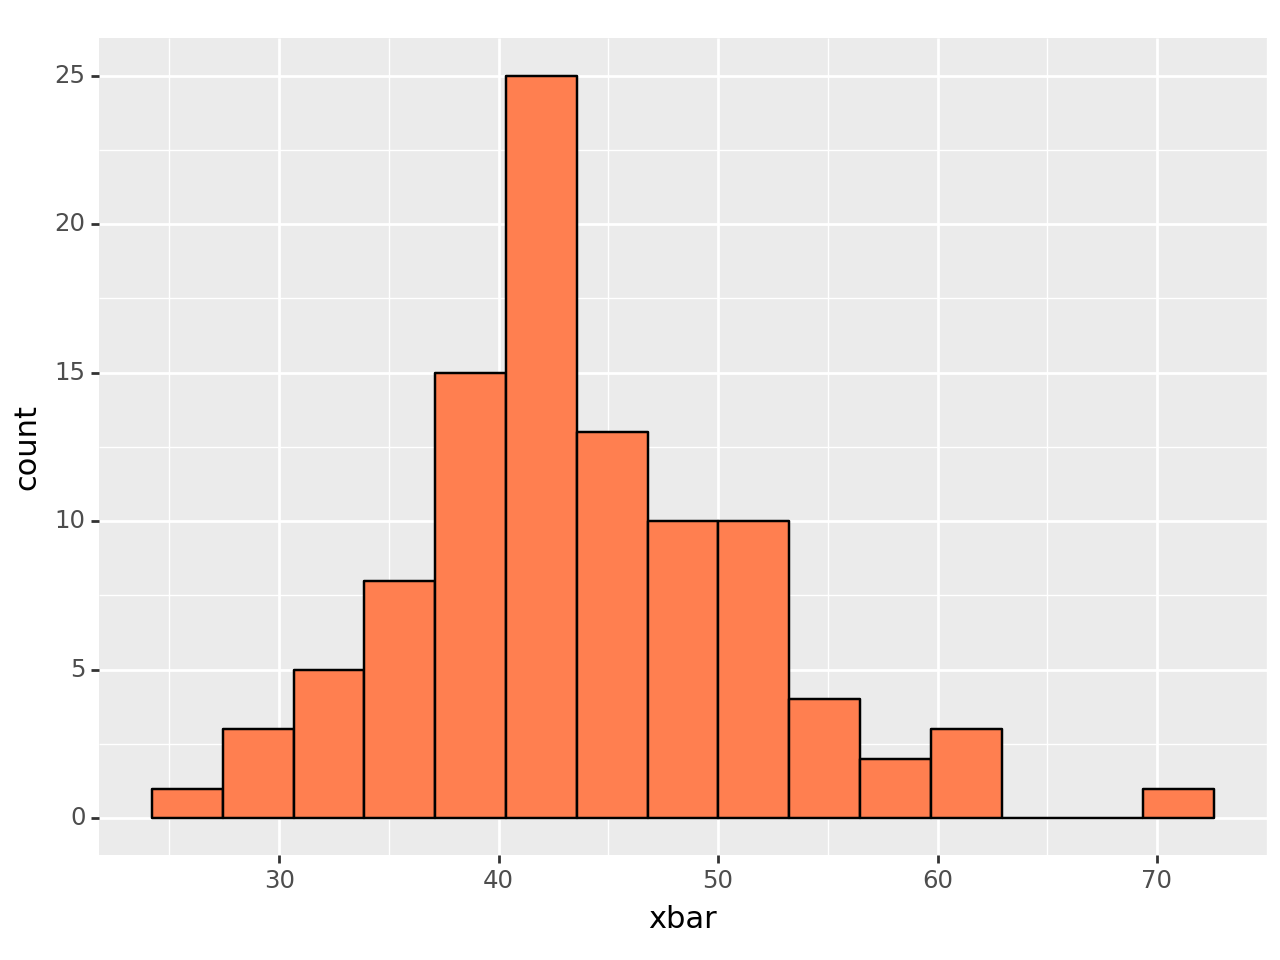

<Figure Size: (640 x 480)>

In [89]:
# prompt: Plot a histogram of the sample means. Describe what shape it makes.

(p9.ggplot(sim_sum, p9.aes(x='xbar'))
+ p9.geom_histogram(colour = 'black', fill = 'coral', bins=15)
)

**Exercise:** Using `geom_pointrange()`, build a graph that shows the sample mean and 95% confidence intervals for each simulation


**Answer:** Have not been able to make this work in Python, not sure why...

Text(0.5, 0, 'Simulation')

Text(0, 0.5, 'Age at Death')

Text(0.5, 1.0, '95% Confidence Intervals for the Mean Age at Death')

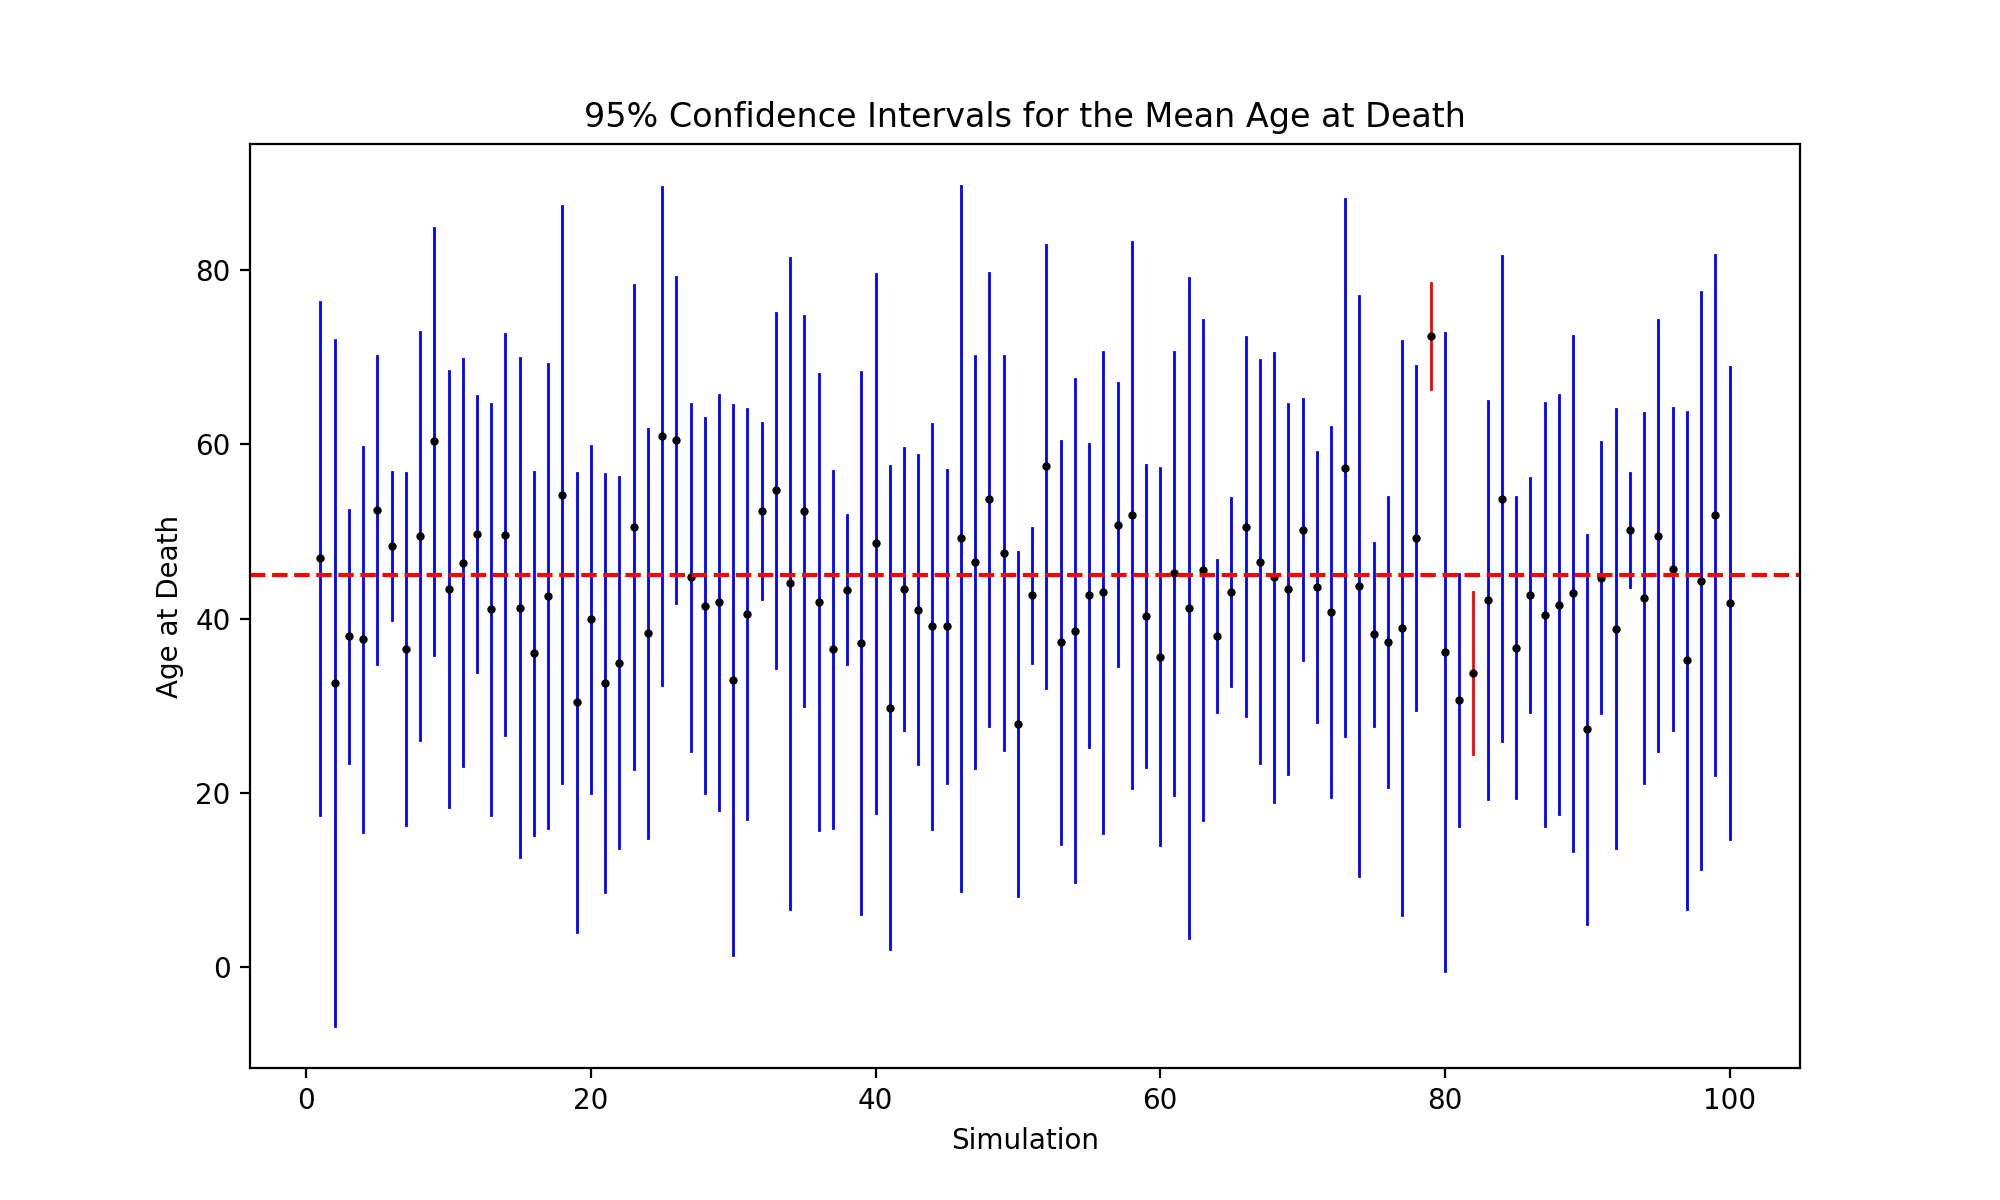

In [136]:
# can't make this work in ggplot for some reason, resorting to matplotlib
# I'm doing the rest of the workshop in this one cell
import seaborn as sns
import matplotlib.pyplot as plt

# set up the coverage and color columns
sim_sum['covers_mu'] = sim_sum.apply(lambda row: row['L95'] <= mu and row['U95'] >= mu, axis=1)
sim_sum['color'] = ['blue' if x else 'red' for x in sim_sum['covers_mu']]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the confidence intervals
for i, row in sim_sum.iterrows():
    ax.plot([i, i], [row["L95"], row["U95"]], color=row["color"], linewidth=1)

# Plot the sample means
ax.plot(sim_sum.index, sim_sum["xbar"], "o", color="black", markersize=2)

# Plot the population mean
ax.axhline(y=45, color='r', linestyle='--')

# Set the axis labels and title
ax.set_xlabel("Simulation")
ax.set_ylabel("Age at Death")
ax.set_title("95% Confidence Intervals for the Mean Age at Death")


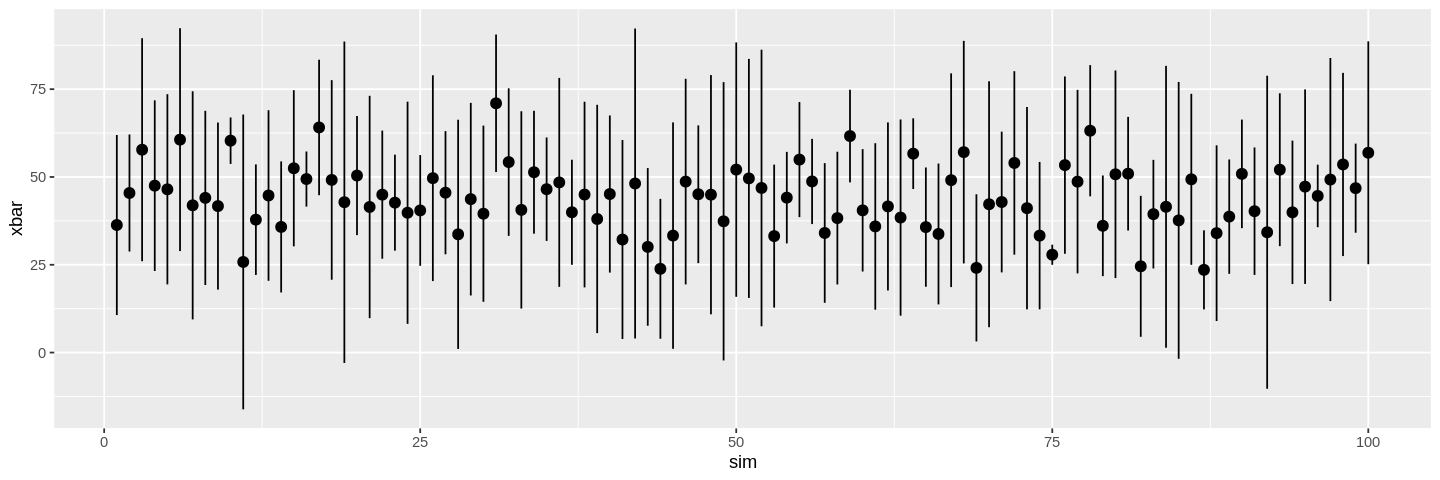

In [ ]:
ggplot(data = simSum, aes(x = sim)) +
  geom_pointrange(aes(
    ymin = L,
    ymax = U,
    y = xbar
  ))

**Exercise:** To help us identify whether the confidence intervals contain the known, true value of $\mu$ let's determine for each simulation whether $L < \mu < U$. **NB:** We are not calculating whether $L < \overline{x} < U$

```{r eval=FALSE}
... <- mutate(..., mu_inside_CI = (L < mu) & (mu < U))
```

**Answer:**


In [ ]:
simSum <- mutate(simSum, mu_inside_CI = (L < mu) & (mu < U))
head(simSum)

sim,xbar,s,se,n,L,U,mu_inside_CI
<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<lgl>
1,36.32305,20.64314,9.231891,5,10.69122,61.95489,TRUE
2,45.43099,13.42150,6.002279,5,28.76599,62.09599,TRUE
3,57.75737,25.56495,11.432991,5,26.01430,89.50044,TRUE
4,47.52408,19.56327,8.748962,5,23.23307,71.81509,TRUE
5,46.48338,21.80611,9.751987,5,19.40753,73.55924,TRUE
6,60.62951,25.55370,11.427961,5,28.90040,92.35862,TRUE


**Exercise:** Let's now build a graph that shows the 95% confidence intervals, coloured by whether or not $\mu$ is inside the CI, with a horizontal line at 45 to indicate the true population mean.

**Answer:**

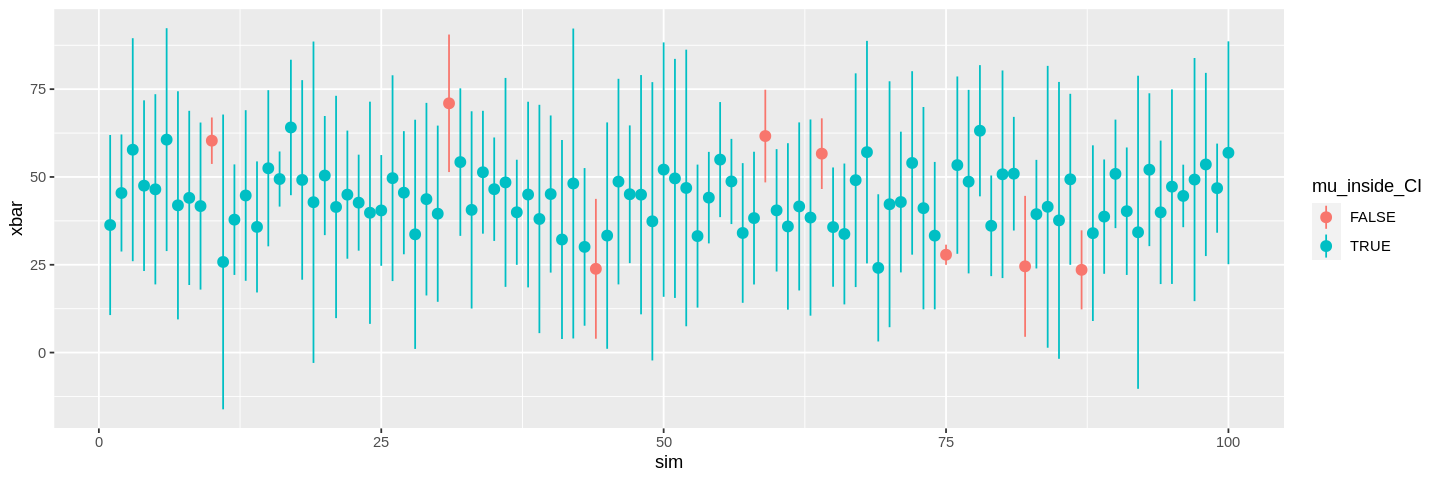

In [ ]:
ggplot(data = simSum, aes(x = sim)) +
  geom_pointrange(aes(
    ymin = L,
    ymax = U,
    y = xbar,
    colour = mu_inside_CI
  ))

**Exercise:** Count how many times $\mu$ is contained within the CI. Is this close to what we expect to see?

**Answer:** got 6, expecting around 5

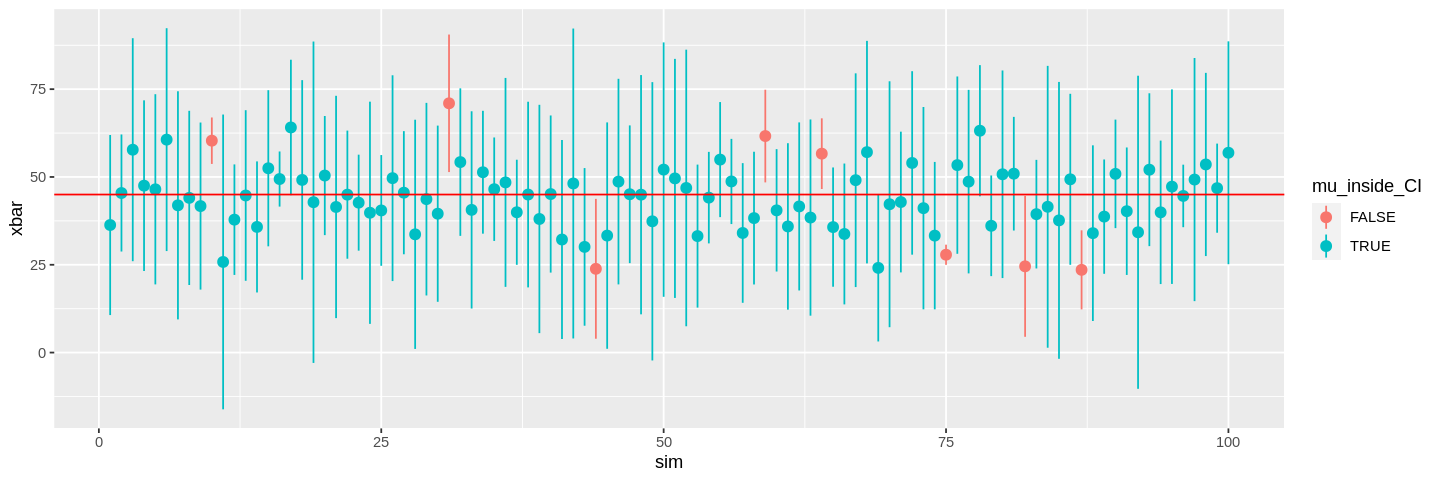

In [ ]:
# prompt: add a horizontal line to the above plot at y=45

ggplot(data = simSum, aes(x = sim)) +
  geom_pointrange(aes(
    ymin = L,
    ymax = U,
    y = xbar,
    colour = mu_inside_CI
  )) +
  geom_hline(yintercept = 45, colour = "red")


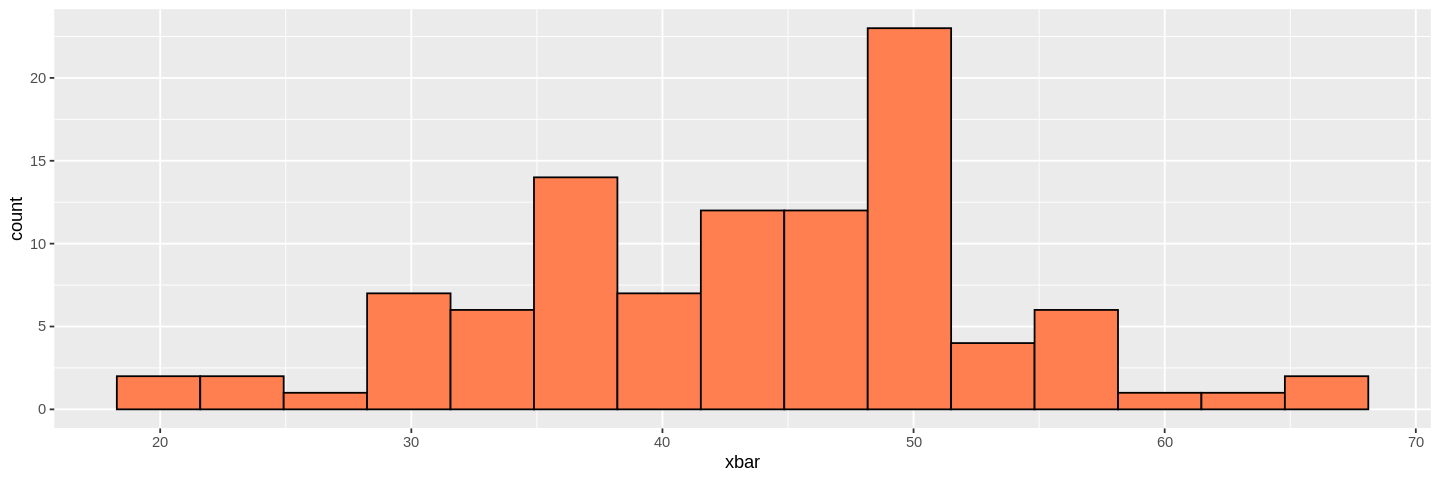

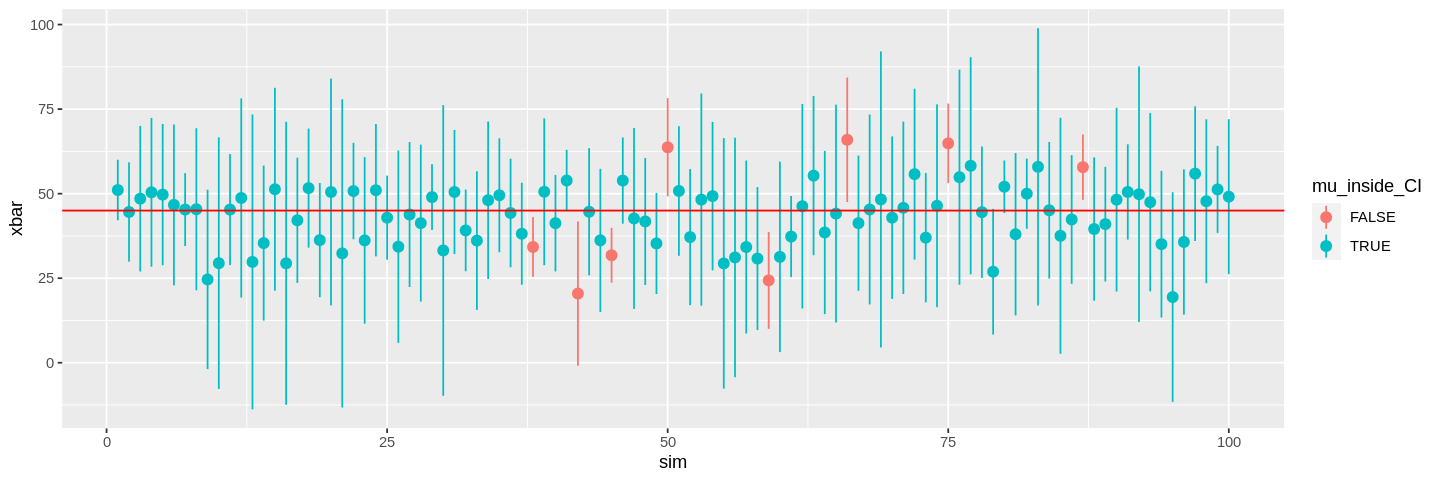

In [ ]:
# Can run this cell to generate these results again for a different distribution and count of covered intervals
# parameter definition
mu=45
sigma=20

# grid definition
n_sims <- 100
n_deaths <- 5

# grid generation
sim_data <- expand.grid(
  death = 1:n_deaths,
  sim = 1:n_sims
)

# data / random value generation
sim_data <- mutate(sim_data,
  Age = rnorm(
    n = n_deaths * n_sims,
    mean = mu,
    sd = sigma
  )
)

sim_data <- group_by(sim_data, sim)
simSum <- summarise(sim_data, xbar = mean(Age), s = sd(Age), se = std.error(Age), n = n() )
simSum <- mutate(simSum, L = xbar + qt(p = 0.025, df = n-1)*se,
                 U = xbar + qt(p = 0.975, df = n-1)*se)
simSum <- mutate(simSum, mu_inside_CI = (L < mu) & (mu < U))

ggplot(data = simSum, aes(x = xbar)) +
  geom_histogram(colour = 'black', fill = 'coral', bins=15)

ggplot(data = simSum, aes(x = sim)) +
  geom_pointrange(aes(
    ymin = L,
    ymax = U,
    y = xbar,
    colour = mu_inside_CI
  )) +
  geom_hline(yintercept = 45, colour = "red")